In [85]:
import pandas as pd
from PIL import Image
from os import path
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [86]:
df1 = pd.read_csv('whatsappchat.txt', sep=r'[ap]m -', names=['time', 'message'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [87]:
df2 = df1['message'].astype(str).str.split(":", expand=True,n=1)
df_all = pd.concat([df1, df2], axis=1)
df_all = df_all.rename(columns={'message': 'total', 0:'name', 1:'message'})
df_all.drop('total', axis=1, inplace=True)

In [88]:
df_all.loc[df_all.time.str.contains(r'[a-zA-Z]')==True, 'message'] = df_all[df_all.time.str.contains(r'[a-zA-Z]')==True].time
df_all.fillna(' ', inplace=True)

In [89]:
df_all = df_all[df_all.name.str.contains("added|changed|created|left")==False]

In [90]:
text = ' '.join(df_all['message'])

In [94]:
STOPWORDS.update(["media", "omitted", "message", "deleted"])

In [92]:
image_mask = np.array(Image.open("Imagee.png"))

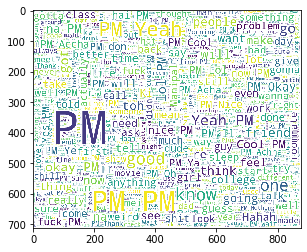

In [93]:
wc = WordCloud(background_color="white", max_words=2000, mask=image_mask, stopwords=STOPWORDS.add("said"))
wc.generate(text)
plt.imshow(wc)
wc.to_file("word_cloud.png")